# Superdense Coding

Alice has two classical bits of information she wants to send to Bob.

- Alice and Bob share a pair of entangled qubits (a Bell state).
- Alice can only send one qubit to Bob.

In [1]:
%matplotlib inline

from qiskit import QuantumCircuit

def alice_prepare(a, b):
    """
    Function to create a quantum circuit for superdense coding.
    :param a: First classical bit (0 or 1)
    :param b: Second classical bit (0 or 1)
    :return: QuantumCircuit object
    """
    qc = QuantumCircuit(2)

    # Create a Bell state
    qc.h(0)  # Apply Hadamard gate to the first qubit
    qc.cx(0, 1)  # Apply CNOT gate with qubit 0 as control and qubit 1 as target

    # Encode the classical bits
    if b == 1:
        qc.z(0)  # Apply Z gate if second bit is 1
    if a == 1:
        qc.x(0)  # Apply X gate if first bit is 1

    return qc

In [2]:
def bob_decode(qc):
    """
    Function to decode the message sent by Alice.
    :param qc: QuantumCircuit object with Alice's operations
    :return: None
    """
    # Bob's operations to decode the message
    qc.cx(0, 1)  # Apply CNOT gate with qubit 0 as control and qubit 1 as target
    qc.h(0)  # Apply Hadamard gate to the first qubit
    qc.measure_all()
    return qc

In [3]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

def run_simulation(qc, shots=1024):
    # Transpile the circuit for the simulator
    simulator = AerSimulator()
    transpiled_circuit = transpile(qc, simulator)

    # Execute the circuit on the simulator
    job = simulator.run(transpiled_circuit, shots=shots)
    result = job.result()

    # Get the counts of the measurement results
    counts = result.get_counts(transpiled_circuit)
    return counts

In [4]:
# Run the superdense coding protocol
def run_superdense_coding(a, b):
    print(f"Alice wants to send bits: {a}, {b}")
    qc = alice_prepare(a, b)
    qc = bob_decode(qc)
    qc.draw(output='mpl')  # Use 'text' for text output or 'mpl' for graphical output
    counts = run_simulation(qc)
    plot_histogram(counts)

Alice wants to send bits: 0, 0


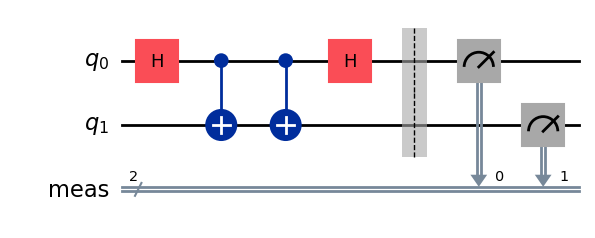

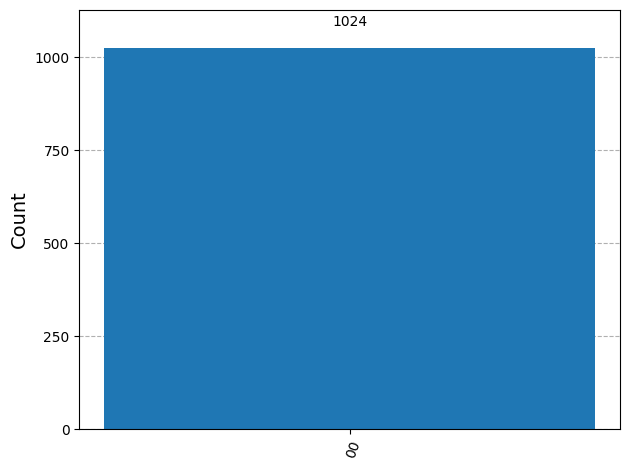

In [5]:
run_superdense_coding(0, 0)

Alice wants to send bits: 0, 1


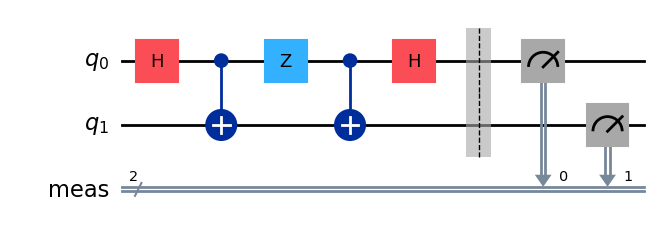

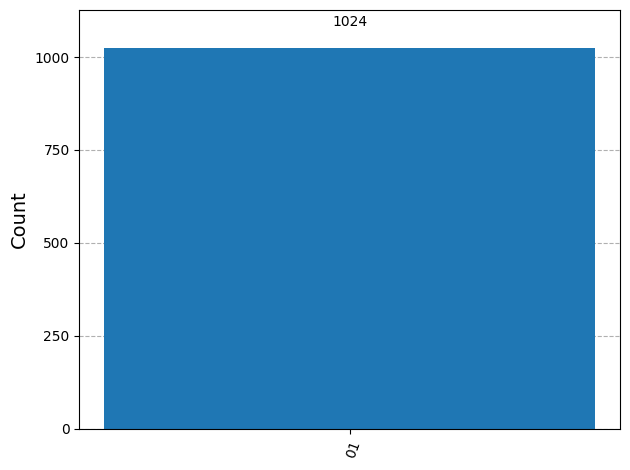

In [6]:
run_superdense_coding(0, 1)

Alice wants to send bits: 1, 0


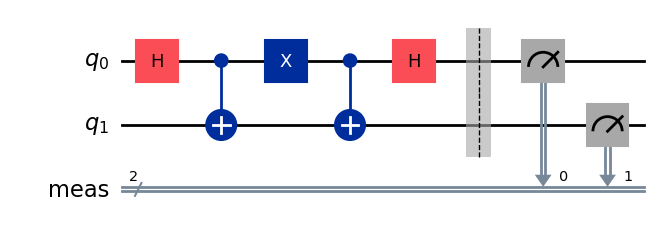

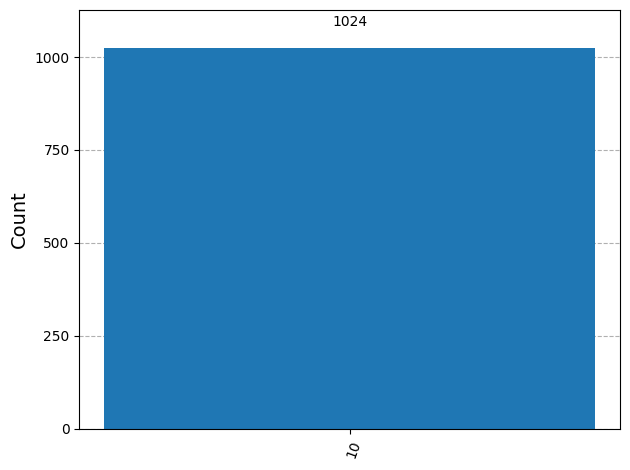

In [7]:
run_superdense_coding(1, 0)

Alice wants to send bits: 1, 1


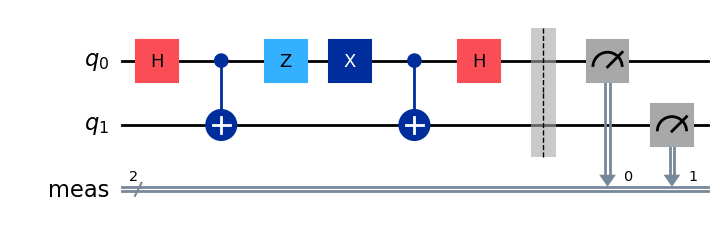

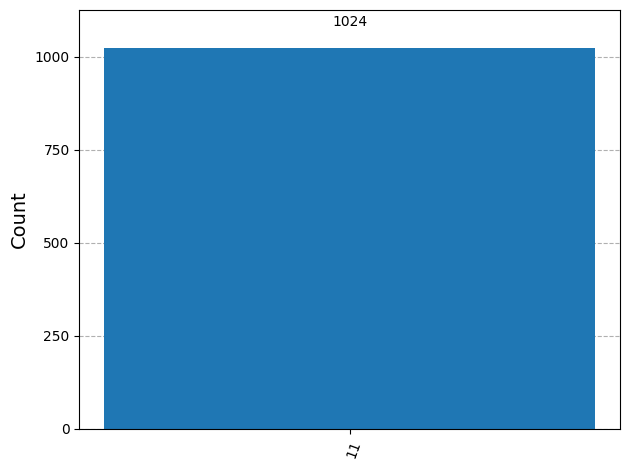

In [8]:
run_superdense_coding(1, 1)